In [47]:
 from sklearn.feature_extraction.text import TfidfVectorizer


In [48]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [49]:
#let's create the vectorizer and fit the corpus and transform them accordingly

v=TfidfVectorizer()
transformed_output=v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [50]:
all_feature_names=v.get_feature_names_out()
for word in all_feature_names:
    index=v.vocabulary_.get(word)
    print(f"{word}{v.idf_[index]}")

already2.386294361119891
am2.386294361119891
amazon2.386294361119891
and2.386294361119891
announcing1.2876820724517808
apple2.386294361119891
are2.386294361119891
ate2.386294361119891
biryani2.386294361119891
dot2.386294361119891
eating1.9808292530117262
eco2.386294361119891
google2.386294361119891
grapes2.386294361119891
iphone2.386294361119891
ironman2.386294361119891
is1.1335313926245225
loki2.386294361119891
microsoft2.386294361119891
model2.386294361119891
new1.2876820724517808
pixel2.386294361119891
pizza2.386294361119891
surface2.386294361119891
tesla2.386294361119891
thor2.386294361119891
tomorrow1.2876820724517808
you2.386294361119891


In [51]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [52]:
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

In [53]:
import pandas as pd
data=pd.read_csv("Ecommerce_data.csv")

In [54]:

print(data.shape)
data.head()

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [55]:
data.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [56]:
data['label_num']=data.label.map({
    'Household':0,
    "Books":1,
    'Electronics':2,
    "Clothing & Accessories":3
})

In [57]:
data.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [58]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
  data.Text,
  data.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=data.label_num
)

In [59]:
print("shape of x_train", x_train.shape)
print('shape of x_test',x_test.shape)

shape of x_train (19200,)
shape of x_test (4800,)


In [60]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ("KNN",KNeighborsClassifier())
])

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [69]:
x_test[:5]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
Name: Text, dtype: object

In [70]:
x_test[:5][20706]

'Lal Haveli Designer Handmade Patchwork Decorative Silk Floor Ottoman Cover Footstool From Handmade Expressions, a fair trade group sometimes all you need is one work of art to bring an entire room together. Silk fabric - they all lend a hand in giving this handcrafted ottoman its fantastic worldly flavor. Because each is handmade using recycled textiles, no two are exactly alike. Indian ottomans and floor pillows look great in any setting, and are a great and affordable way to add some comfortable seating for your guests!'

In [68]:
y_test[:5]

20706    0
19166    2
15209    3
2462     1
6621     3
Name: label_num, dtype: int64

In [64]:
y_pred[:5]

array([0, 2, 3, 1, 0], dtype=int64)

 'Household':0,
    "Books":1,
    'Electronics':2,
    "Clothing & Accessories":3
})

In [65]:
from sklearn.naive_bayes import MultinomialNB


clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [75]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
#####Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [76]:
import spacy


nlp = spacy.load("en_core_web_lg") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [82]:
data['preprocessed_text']=data["Text"].apply(preprocess)

In [83]:
data.head()

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 pci raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer Women Art Mysore Silk Saree Bl...


In [84]:
data.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [85]:
data.preprocessed_text[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space Chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [86]:
x_train,x_test,y_train,y_test=train_test_split(
  data.Text,
  data.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=data.label_num
)

In [87]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])


clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [ ]:
####plot confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,y_pred)
CM

array([[1152,   16,   15,   17],
       [  18, 1174,    5,    3],
       [  22,   10, 1163,    5],
       [  11,    5,    1, 1183]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

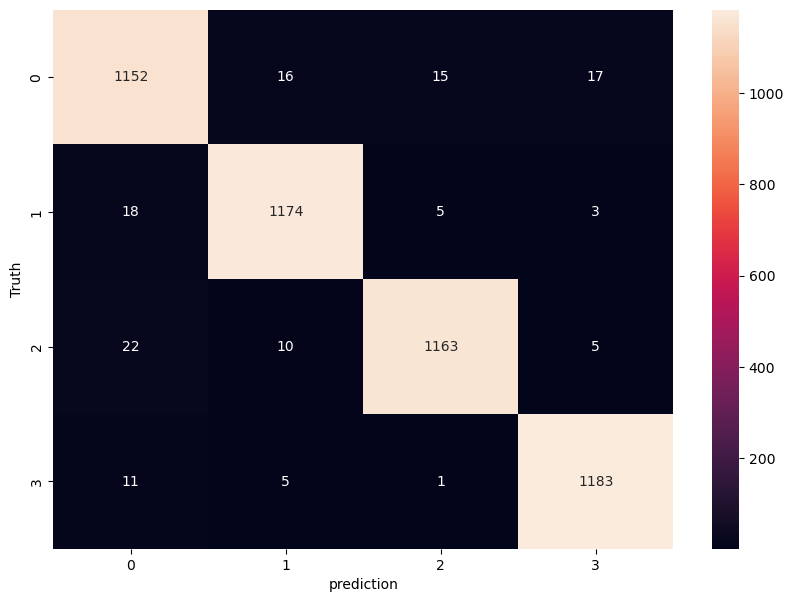

In [89]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure (figsize=(10,7))
sn.heatmap(CM,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')